In [18]:
# Importing libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn import datasets
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn import linear_model
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import classification_report
from sklearn import svm
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score

In [19]:
# Training a multi layer percetro for data with two classes
data = np.loadtxt(r'\Users\alana\Documents\TecMTY\RoboticaInteligente\DeepLearning\red_neronal\mist_data\misterious_data_1.txt')
x = data[:,1:]
y = data[:,0]

# Train MLP classifier with all available observations
clf = MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=10000)
clf.fit(x, y)

# Applying cross validation
kf = KFold(n_splits=5, shuffle = True)

acc = 0
for train_index, test_index in kf.split(x):
    # Training phase
    x_train = x[train_index, :]
    y_train = y[train_index]

    clf_i = MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=10000)
    clf_i.fit(x_train, y_train)

    # Test phase
    x_test = x[test_index, :]
    y_test = y[test_index]    
    y_pred = clf_i.predict(x_test)

    # Calculate confusion matrix and model performance
    cm = confusion_matrix(y_test, y_pred)
    acc_i = (cm[0,0]+cm[1,1])/len(y_test)    
    print('acc = ', acc_i)

    acc += acc_i 

acc = acc/5
print('ACC = ', acc)

acc =  0.7830188679245284
acc =  0.7452830188679245
acc =  0.8113207547169812
acc =  0.780952380952381
acc =  0.7714285714285715
ACC =  0.7784007187780773


In [20]:
# Training a multi perceptron using data with four classes
data_two = np.loadtxt(r'\Users\alana\Documents\TecMTY\RoboticaInteligente\DeepLearning\red_neronal\mist_data\misterious_data_4.txt')
x = data[:,1:]
y = data[:,0]

# Train MLP classifier with all available observations
clf = MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=10000)
clf.fit(x, y)

# Applying cross validation
kf = KFold(n_splits=5, shuffle = True)

acc = 0
for train_index, test_index in kf.split(x):
    # Training phase
    x_train = x[train_index, :]
    y_train = y[train_index]

    clf_i = MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=10000)
    clf_i.fit(x_train, y_train)

    # Test phase
    x_test = x[test_index, :]
    y_test = y[test_index]    
    y_pred = clf_i.predict(x_test)

    # Calculate confusion matrix and model performance
    cm = confusion_matrix(y_test, y_pred)
    acc_i = np.trace(cm) / np.sum(cm)   
    print('acc = ', acc_i)

    acc += acc_i 

acc = acc/5
print('ACC = ', acc)

acc =  0.7547169811320755
acc =  0.8113207547169812
acc =  0.7641509433962265
acc =  0.7904761904761904
acc =  0.780952380952381
ACC =  0.7803234501347709


-----------Variable 0
Coeficientes del modelo:  [304.18307453]
MSE:  5720.5470172056475
R^2:  0.03530218264671636


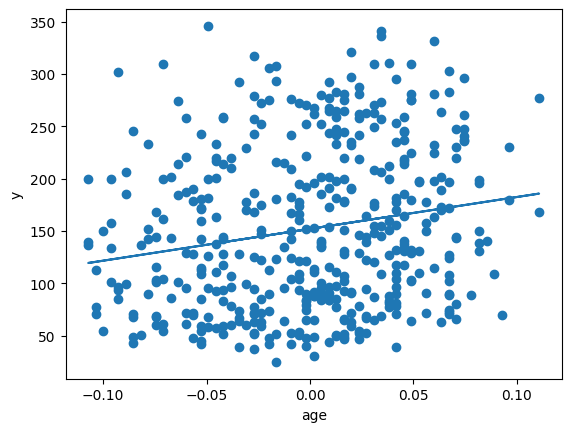

-----------Variable 1
Coeficientes del modelo:  [69.71535568]
MSE:  5918.888899586022
R^2:  0.0018543357106460823


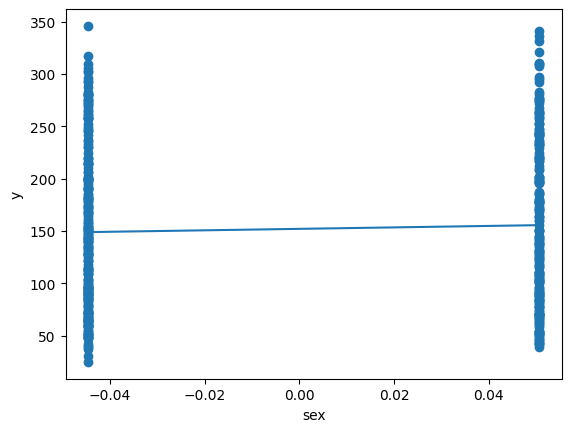

-----------Variable 2
Coeficientes del modelo:  [949.43526038]
MSE:  3890.456585461273
R^2:  0.3439237602253802


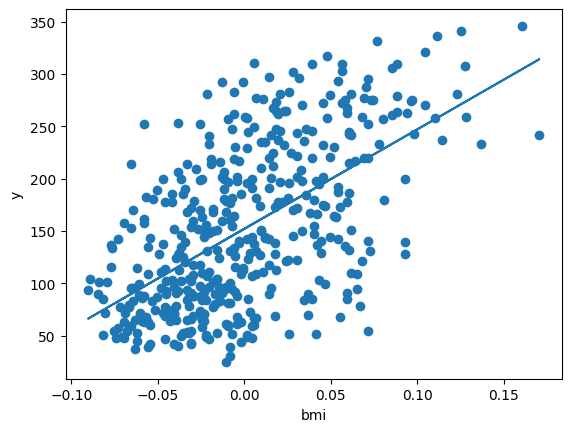

-----------Variable 3
Coeficientes del modelo:  [714.7382595]
MSE:  4774.113902368687
R^2:  0.1949061431435003


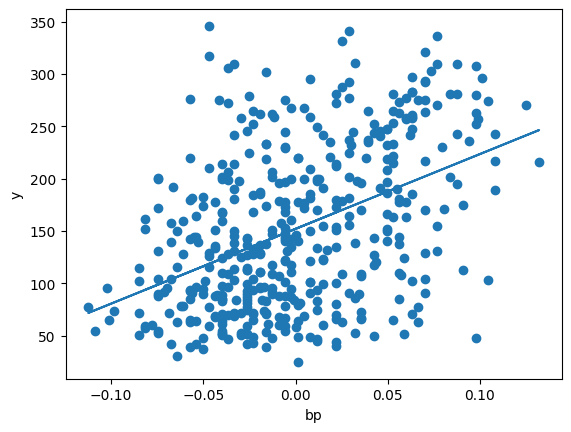

-----------Variable 4
Coeficientes del modelo:  [343.25445189]
MSE:  5663.315623739354
R^2:  0.04495353245556555


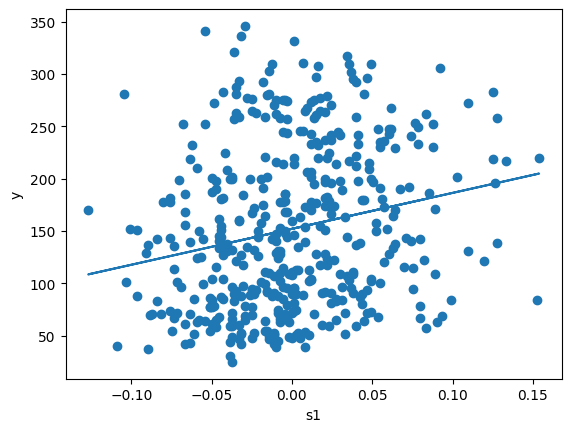

-----------Variable 5
Coeficientes del modelo:  [281.78459335]
MSE:  5750.241102677782
R^2:  0.030294651136685613


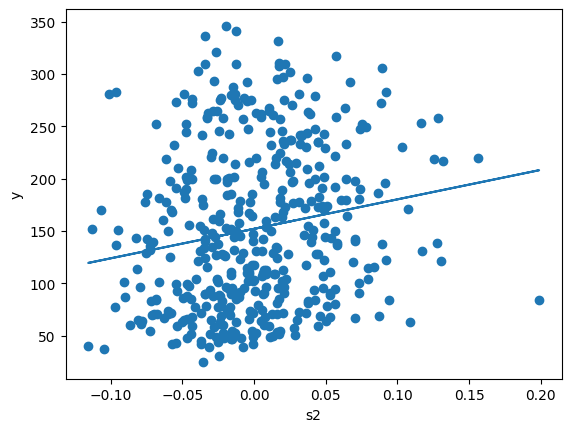

-----------Variable 6
Coeficientes del modelo:  [-639.14527932]
MSE:  5005.661620710652
R^2:  0.15585855244530533


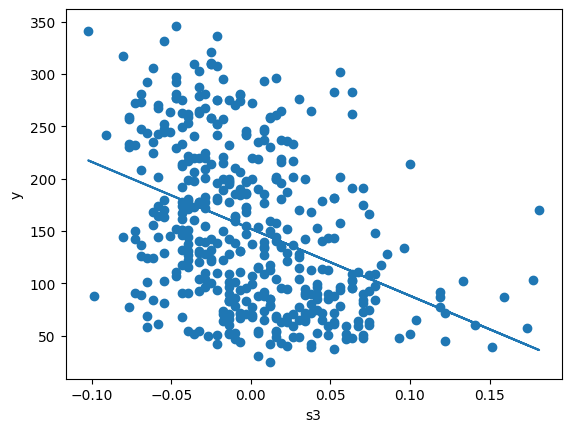

-----------Variable 7
Coeficientes del modelo:  [696.88303009]
MSE:  4831.13838643409
R^2:  0.18528968598509687


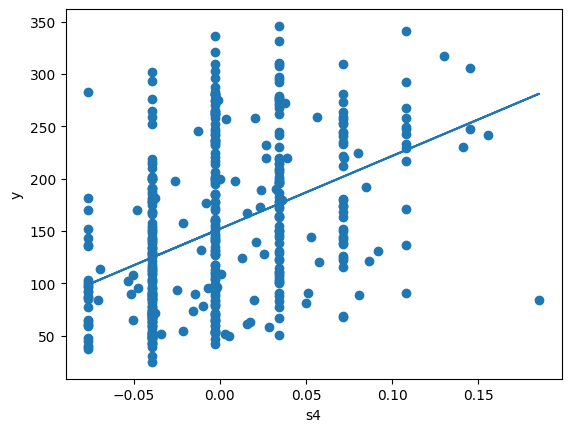

-----------Variable 8
Coeficientes del modelo:  [916.13737455]
MSE:  4030.9987225912855
R^2:  0.3202231084297208


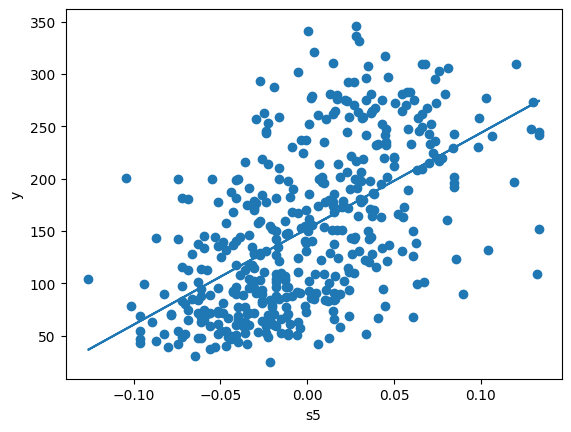

-----------Variable 9
Coeficientes del modelo:  [619.22282068]
MSE:  5062.380594520542
R^2:  0.14629361572293453


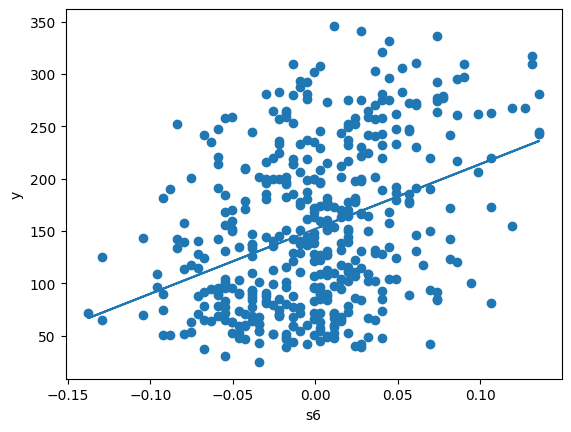

In [21]:
# Using diabetes dataset to evaluate in a multilayer perceptron

#Loading data and checking it
diabetes = datasets.load_diabetes()
x = diabetes.data
y = diabetes.target
features = diabetes.feature_names
n_features = len(features)

# Train MLP classifier with all available observations
clf = MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=10000)
clf.fit(x, y)

# Applying cross validation
kf = KFold(n_splits=5, shuffle = True)

acc = 0

# Train linear regression for one variable
for var in range(n_features):
    print ('-----------Variable', var)

    regr = linear_model.LinearRegression()
    regr.fit(x[:,var].reshape(-1, 1), y)
    print("Coeficientes del modelo: ", regr.coef_)

    y_pred = regr.predict(x[:,var].reshape(-1, 1))
    print('MSE: ', mean_squared_error(y, y_pred))
    print("R^2: ", r2_score(y, y_pred))

    plt.scatter(x[:,var], y)
    plt.plot(x[:,var], y_pred)
    plt.xlabel(features[var])
    plt.ylabel('y')
    plt.show()

